<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML241ENSkillsNetwork31576874-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **K Nearest Neighbor**


Estimated time needed: **30** minutes


In this lab, you will learn about and practice the K Nearest Neighbor (KNN) model. KNN is a straightforward but very effective model that can be used for both classification and regression tasks. If the feature space is not very large, KNN can be a high-interpretable model because you can explain and understand how a prediction is made by looking at its nearest neighbors.


We will be using a tumor sample dataset containing lab test results about tumor samples. The objective is to classify whether a tumor is malicious (cancer) or benign. As such, it is a typical binary classification task.


## Objectives


After completing this lab, you will be able to:


*   Train KNN models with different neighbor hyper-parameters
*   Evaluate KNN models on classification tasks
*   Tune the number of neighbors and find the optimized one for a specific task


***


First, let's install `seaborn` for visualization tasks and import required libraries for this lab.


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.3 numpy==1.21.2 ipywidgets==7.4.2 scipy==7.4.2 tqdm==4.62.3 matplotlib==3.5.0 seaborn==0.9.0
# Note: If your environment doesn't support "!mamba install", use "!pip install".

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Evaluation metrics related methods
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [2]:
# Define a random seed to reproduce any random process
rs = 123

In [3]:
# Ignore any deprecation warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

## Load and explore the tumor sample dataset


We first load the dataset `tumor.csv` as a Pandas dataframe:


In [4]:
# Read datast in csv format
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/tumor.csv"
tumor_df = pd.read_csv(dataset_url)

Then, let's quickly take a look at the head of the dataframe.


In [5]:
tumor_df.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


And, display its columns.


In [6]:
tumor_df.columns

Index(['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc',
       'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

Each observation in this dataset contains lab test results about a tumor sample, such as clump or shapes. Based on these lab test results or features, we want to build a classification model to predict if this tumor sample is malicious (cancer) or benign. The target variable `y` is specified in the `Class` column.


Then, let's split the dataset into input `X` and output `y`:


In [7]:
X = tumor_df.iloc[:, :-1]
y = tumor_df.iloc[:, -1:]

And, we first check the statistics summary of features in `X`:


In [8]:
X.describe()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


As we can see from the above cell output, all features are numeric and ranged between 1 to 10. This is very convenient as we do not need to scale the feature values as they are already in the same range.


Next, let's check the class distribution of output `y`:


In [9]:
y.value_counts(normalize=True)

Class
0        0.650073
1        0.349927
dtype: float64

<AxesSubplot:xlabel='Class'>

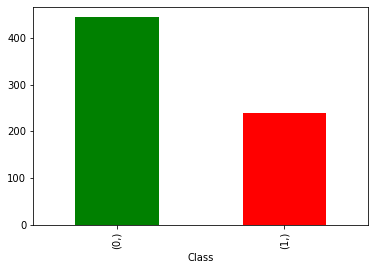

In [10]:
y.value_counts().plot.bar(color=['green', 'red'])

We have about 65% benign tumors (`Class = 0`) and 35% cancerous tumors (`Class = 1`), which is not a very imbalanced class distribution.


## Process and split training and testing datasets


In [11]:
# Split 80% as training dataset
# and 20% as testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = rs)

## Train and evaluate a KNN classifier with the number of neighbors set to 2


Training a KNN classifier is very similar to training other classifiers in `sklearn`, we first need to define a `KNeighborsClassifier` object. Here we use `n_neighbors=2` argument to specify how many neighbors will be used for prediction, and we keep other arguments to be their default values.


In [12]:
# Define a KNN classifier with `n_neighbors=2`
knn_model = KNeighborsClassifier(n_neighbors=2)

Then we can train the model with `X_train` and `y_train`, and we use ravel() method to convert the data frame `y_train` to a vector.


In [13]:
knn_model.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

And, we can make predictions on the `X_test` dataframe.


In [14]:
preds = knn_model.predict(X_test)

To evaluate the KNN classifier, we provide a pre-defined method to return the commonly used evaluation metrics such as accuracy, recall, precision, f1score, and so on, based on the true classes in the 'y_test' and model predictions.


In [15]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='binary')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [16]:
evaluate_metrics(y_test, preds)

{'accuracy': 0.9416058394160584,
 'recall': 0.875,
 'precision': 0.9545454545454546,
 'f1score': 0.9130434782608695}

We can see that there is a great classification performance on the tumor sample dataset. This means the KNN model can effectively recognize cancerous tumors.
Next, it's your turn to try a different number of neighbors to see if we could get even better performance.


## Coding exercise: Train and evaluate a KNN classifier with number of neighbors set to 5


First, define a KNN classifier with KNeighborsClassifier class:


In [ ]:
# Type your code here


Then train the model with `X_train` and `y_train`:


In [ ]:
# Type your code here


And, make predictions on `X_test` dataframe:


In [ ]:
# Type your code here
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train.values.ravel())
preds = model.predict(X_test)
evaluate_metrics(y_test, preds)

At last, you can evaluate your KNN model with provided `evaluate_metrics()` method.


<details><summary>Click here for a sample solution</summary>

```python
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train.values.ravel())
preds = model.predict(X_test)
evaluate_metrics(y_test, preds)
```

</details>


## Tune the number of neighbors to find the optmized one


OK, you may wonder which `n_neighbors` argument may give you the best classification performance. We can try different `n_neighbors` (the K value) and check which `K` gives the best classification performance.


Here we could try K from 1 to 50, and store the aggregated `f1score` for each k into a list.


In [ ]:
# Try K from 1 to 50
max_k = 50
# Create an empty list to store f1score for each k
f1_scores = []

Then we will train 50 KNN classifiers with K ranged from 1 to 50.


In [ ]:
for k in range(1, max_k + 1):
    # Create a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Train the classifier
    knn = knn.fit(X_train, y_train.values.ravel())
    preds = knn.predict(X_test)
    # Evaluate the classifier with f1score
    f1 = f1_score(preds, y_test)
    f1_scores.append((k, round(f1_score(y_test, preds), 4)))
# Convert the f1score list to a dataframe
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
f1_results.set_index('K')

This is a long list and different to analysis, so let's visualize the list using a linechart.


In [ ]:
# Plot F1 results
ax = f1_results.plot(figsize=(12, 12))
ax.set(xlabel='Num of Neighbors', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.ylim((0.85, 1))
plt.title('KNN F1 Score')

As we can see from the F1 score linechart, the best `K` value is 5 with about `0.9691` f1score.


## Next steps


Great! Now you have learned about and applied the KNN model to solve a real-world tumor type classification problem. You also tuned the KNN to find the best K value. Later, you will continue learning other popular classification models with different structures, assumptions, cost functions, and application scenarios.


## Authors


[Yan Luo](https://www.linkedin.com/in/yan-luo-96288783/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML241ENSkillsNetwork31576874-2022-01-01)


### Other Contributors


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By | Change Description          |
| ----------------- | ------- | ---------- | --------------------------- |
| 2021-11-9         | 1.0     | Yan        | Created the initial version |
| 2022-3-29         | 1.1     | Steve Hord | QA Pass                     |


Copyright © 2021 IBM Corporation. All rights reserved.
